In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = {'Marketing Spend( Million $)' : [23 , 26, 30 , 34 , 43 , 48], 
        'Sales (Million $)': [651 , 762 , 856 ,1063 , 1190 , 1298]}
data = pd.DataFrame(data)
data

,Marketing Spend( Million $),Sales (Million $)
0,23,651
1,26,762
2,30,856
3,34,1063
4,43,1190
5,48,1298


In above data frame `Sales` is our target variable and `Marketing Spend` is our predictor variable.

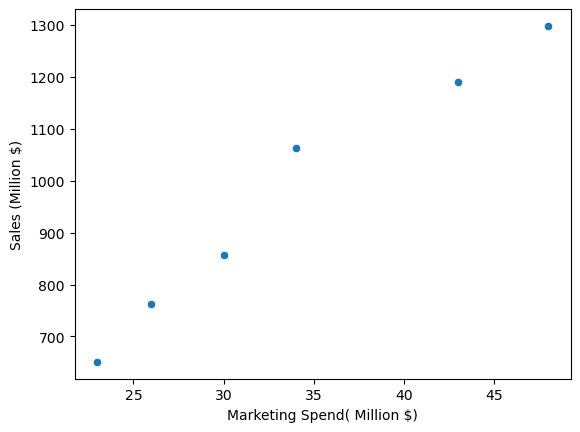

In [4]:
sns.scatterplot(data, x='Marketing Spend( Million $)', y='Sales (Million $)')
plt.show()

We can see the linear relationship between `Marketing Spend` and `Sales`. We will create 3 models and compare them.

- Simple Linear Model
- Polynomial Model
- Ridge Model

### Simple Linear Model

In [5]:
X = np.array(data['Marketing Spend( Million $)']).reshape(-1, 1)
y = np.array(data['Sales (Million $)']).reshape(-1, 1)

In [6]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

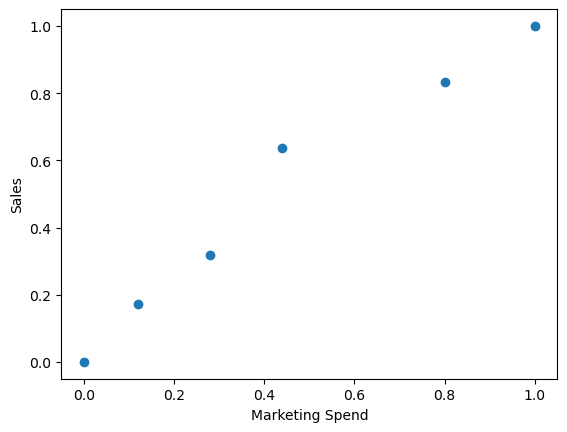

In [7]:
plt.scatter(X, y)
plt.xlabel('Marketing Spend')
plt.ylabel('Sales')
plt.show()

In [8]:
lm = LinearRegression().fit(X, y)

In [9]:
lm.coef_

array([[0.98628689]])

In [10]:
lm.intercept_

array([0.05907859])

In [11]:
y_pred_lm = lm.predict(X)
print('R2 score:', r2_score(y, y_pred_lm))
print('RMSE:', mean_squared_error(y, y_pred_lm)**0.5)

R2 score: 0.9652190930694494
RMSE: 0.06684348308019873


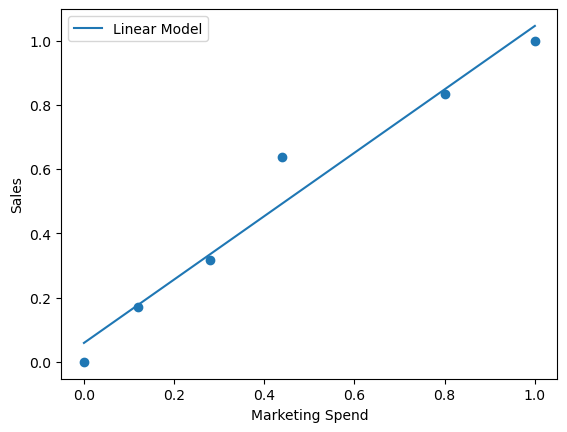

In [12]:
plt.scatter(X, y)
plt.plot(X, y_pred_lm, label = 'Linear Model')
plt.xlabel('Marketing Spend')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Polynomial model with degree = 5

In [13]:
pf = PolynomialFeatures(5)
X_pf = pf.fit_transform(X)

In [14]:
pm = LinearRegression().fit(X_pf, y)

In [15]:
pm.coef_

array([[  0.        ,   2.94295226, -19.85351777,  71.18543313,
        -95.27426562,  41.99939801]])

In [16]:
pm.intercept_

array([-4.49640325e-15])

In [17]:
y_pred_pm = pm.predict(X_pf)
print('R2 score:', r2_score(y, y_pred_pm))
print('RMSE:', mean_squared_error(y, y_pred_pm)**0.5)

R2 score: 1.0
RMSE: 5.2102669157582964e-15


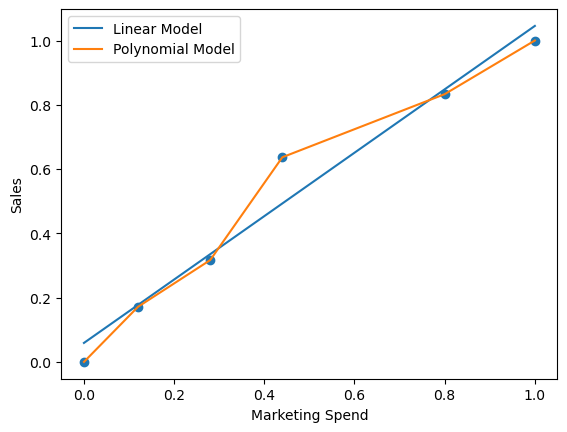

In [18]:
plt.scatter(X, y)
plt.plot(X, y_pred_lm, label = 'Linear Model')
plt.plot(X, y_pred_pm, label = 'Polynomial Model')
plt.xlabel('Marketing Spend')
plt.ylabel('Sales')
plt.legend()
plt.show()

Above polynomial model is clearly a overfit in the data. To remove the overfitting we will use Ridge Regression.

### Ridge Model

alpha: 0
R2 score: 1.0
RMSE: 3.033960772906265e-15
RSS 5.522950782920389e-29
coefficients: [[  0.           2.94295226 -19.85351777  71.18543313 -95.27426562
   41.99939801]]




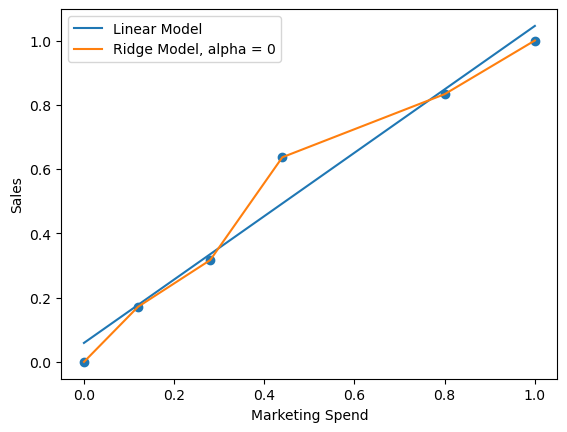

alpha: 0.01
R2 score: 0.9809539612050426
RMSE: 0.049464195866442046
RSS 0.014680240036282455
coefficients: [[ 0.          1.13560973  0.13020587 -0.17959473 -0.14842149  0.01704645]]




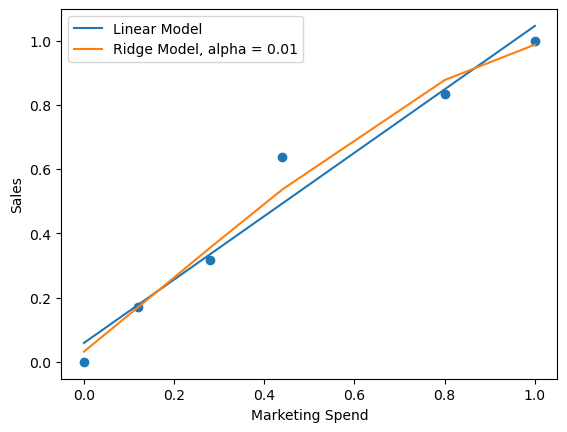

alpha: 0.1
R2 score: 0.9396437428481395
RMSE: 0.08805413821464733
RSS 0.046521187540345295
coefficients: [[ 0.          0.65027964  0.2651751   0.07110798 -0.02396289 -0.07201942]]




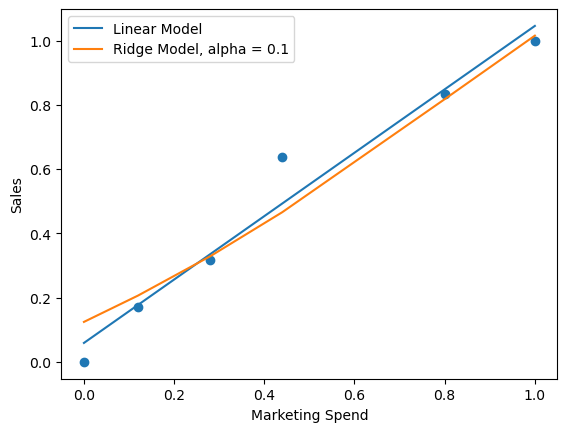

alpha: 1
R2 score: 0.7953946450161844
RMSE: 0.16212392853702426
RSS 0.15770500922566888
coefficients: [[0.         0.22867197 0.16688081 0.12627838 0.10086186 0.08408679]]




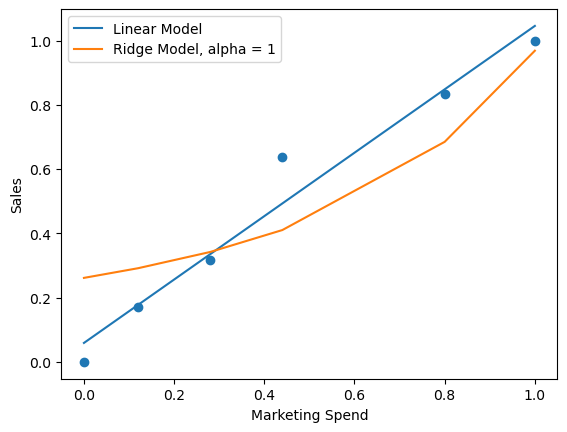

alpha: 10
R2 score: 0.3849505189364377
RMSE: 0.28108886966290114
RSS 0.4740657158902045
coefficients: [[0.         0.0571764  0.05346191 0.0489761  0.04550657 0.04291024]]




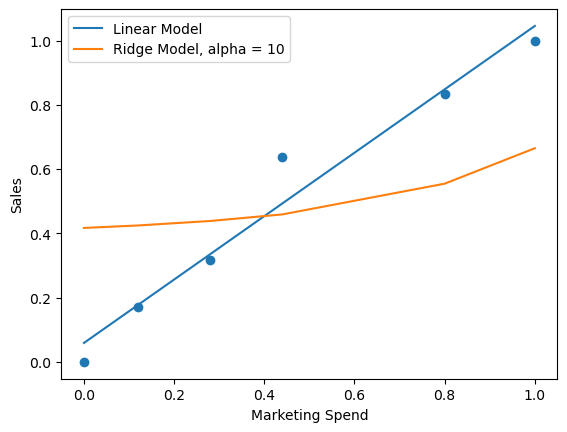

In [24]:
alphas = [0, 0.01, 0.1, 1, 10]


for alpha in alphas:
    rm = Ridge(alpha=alpha)
    rm.fit(X_pf, y)
    y_pred_rm = rm.predict(X_pf)
    print('alpha:', alpha)
    print('R2 score:', r2_score(y, y_pred_rm))
    print('RMSE:', mean_squared_error(y, y_pred_rm)**0.5)
    print('RSS', np.sum( (y-y_pred_rm)**2 ) )
    print('coefficients:', rm.coef_)
    print('\n')
    plt.scatter(X, y)
    plt.plot(X, y_pred_lm, label = 'Linear Model')
    plt.plot(X, y_pred_rm, label = 'Ridge Model, alpha = {0}'.format(alpha))
    plt.xlabel('Marketing Spend')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

In above plot we can see 

- With alpha = 0 is overfitting.
- with alpha = 0.1 is the best fit which matches with our linear model.
- with alpha = 1 and 10 the model starts underfit with data.

### Lasso Model

alpha: 0
R2 score: 0.9882107530558196
RMSE: 0.038916309913431216
coefficients: [ 0.          1.46152502  0.16901155 -1.08666253 -0.14086504  0.60488725]




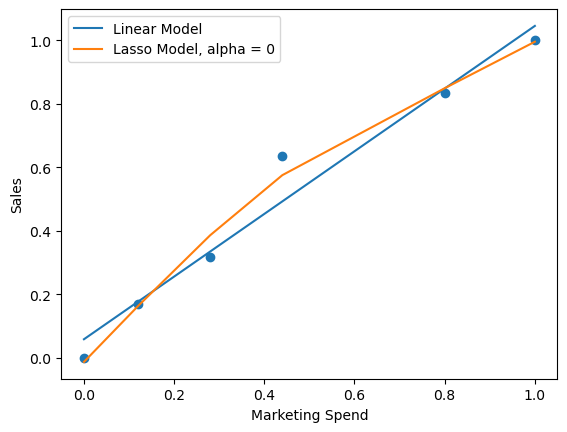

alpha: 0.01
R2 score: 0.9591121182494984
RMSE: 0.0724746166512435
coefficients: [0.       0.907835 0.       0.       0.       0.      ]




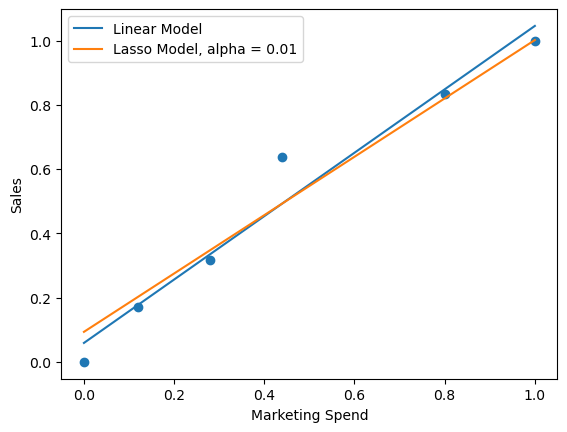

alpha: 0.1
R2 score: 0.3545216110743441
RMSE: 0.2879582158499409
coefficients: [0.         0.20176806 0.         0.         0.         0.        ]




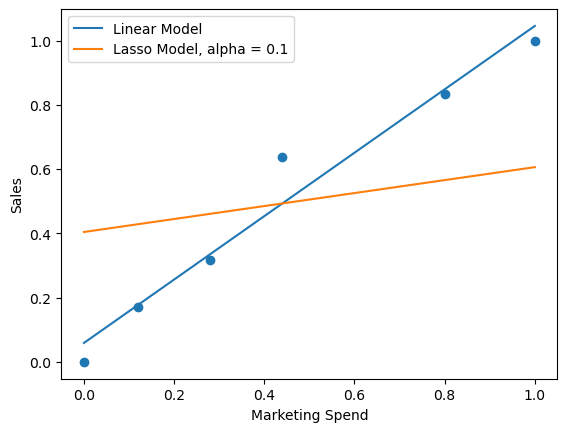

alpha: 1
R2 score: 0.0
RMSE: 0.35841701690527095
coefficients: [0. 0. 0. 0. 0. 0.]




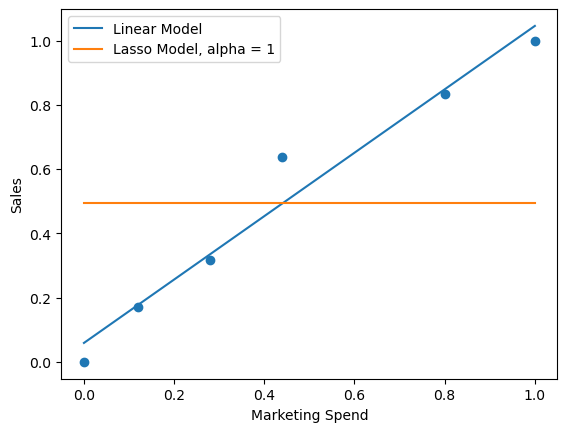

alpha: 10
R2 score: 0.0
RMSE: 0.35841701690527095
coefficients: [0. 0. 0. 0. 0. 0.]




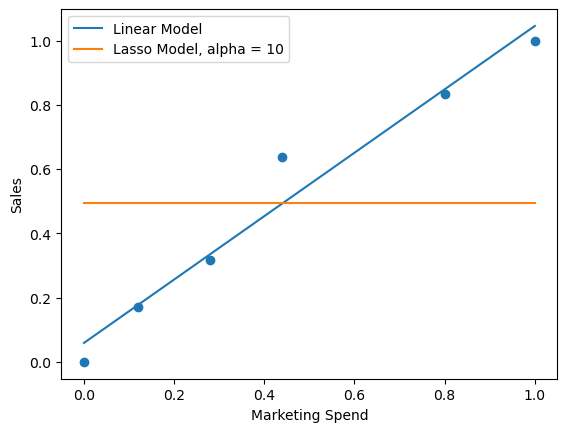

In [20]:
alphas = [0, 0.01, 0.1, 1, 10]

for alpha in alphas:
    lasm = Lasso(alpha=alpha)
    lasm.fit(X_pf, y)
    y_pred_lasm = lasm.predict(X_pf)
    print('alpha:', alpha)
    print('R2 score:', r2_score(y, y_pred_lasm))
    print('RMSE:', mean_squared_error(y, y_pred_lasm)**0.5)
    print('coefficients:', lasm.coef_)
    print('\n')
    plt.scatter(X, y)
    plt.plot(X, y_pred_lm, label = 'Linear Model')
    plt.plot(X, y_pred_lasm, label = 'Lasso Model, alpha = {0}'.format(alpha))
    plt.xlabel('Marketing Spend')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

In above plot we can see 

- With alpha = 0 is overfitting.
- with alpha = 0.01 is the best fit which matches with our linear model.
- with alpha = 0.1, 1 and 10 the model starts underfit with data.